In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
infile_dimuons = "/global/u1/r/rmastand/dimuonAD/test_muons.dat"
infile_jets = "/global/u1/r/rmastand/dimuonAD/test_fj_output.dat"

In [3]:
ifile_muons = open(infile_dimuons, "r")
ifile_jets = open(infile_jets, "r")


In [4]:
read_muons = ifile_muons.readlines()
read_jets = ifile_jets.readlines()

if len(read_muons) != len(read_jets):
    print("ERROR! Different number of muon and jet events.")
    print(len(read_muons), len(read_jets))

In [5]:
data_array = np.empty((1,9))
# dimu pi eta phi M jet pi eta phi M tau21

for i in range(len(read_muons)):
    if "#" in read_muons[i]: # at begin or end event
        pass
    else:
        loc_event = []
        
        # muons
        dimu_values = read_muons[i].split()
        loc_event.append(float(dimu_values[0])) # dimuon pt
        loc_event.append(float(dimu_values[1])) # dimuon eta
        loc_event.append(float(dimu_values[2])) # dimuon phi
        loc_event.append(float(dimu_values[3])) # dimuon M
        
        # jets
        jet_values = read_jets[i].split()
        loc_event.append(float(jet_values[0])) # jet pt
        loc_event.append(float(jet_values[1])) # jet eta
        loc_event.append(float(jet_values[2])) # jet phi
        loc_event.append(float(jet_values[3])) # jet M
        loc_event.append(float(jet_values[4])) # jet tau21
        
        loc_event = np.array(loc_event).reshape(1,9)
        
        data_array = np.vstack((data_array, loc_event))
        
data_array = data_array[1:] 
print("Done!")
print(f"Data array has shape {data_array.shape}")

Done!
Data array has shape (100, 9)


In [6]:

ifile_muons.close()
ifile_jets.close()

np.save("all_data", data_array)

In [7]:
data_array = np.load("all_data.npy")

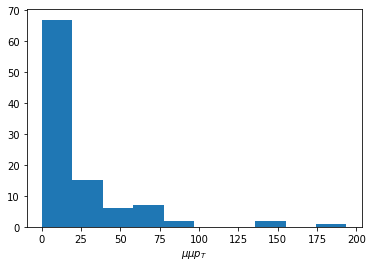

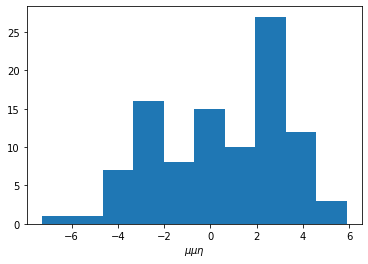

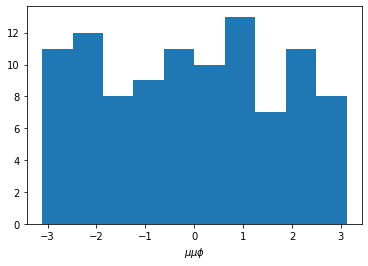

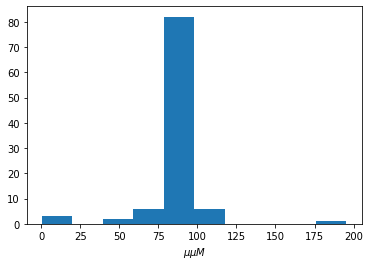

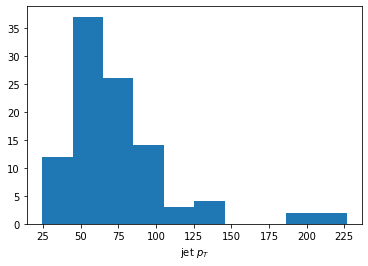

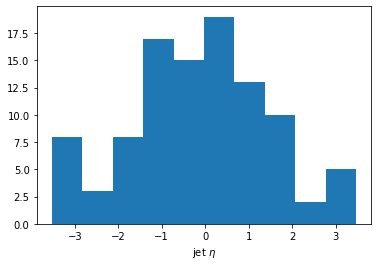

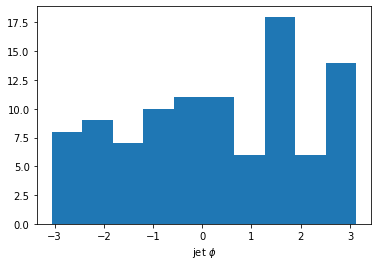

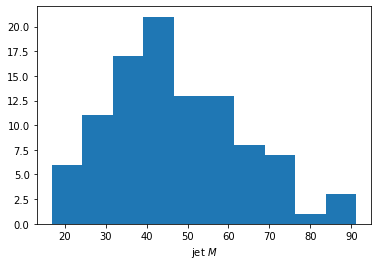

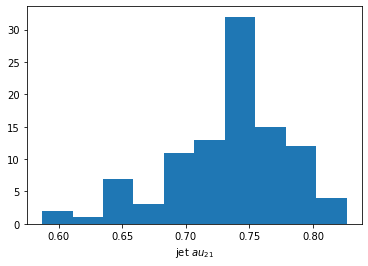

In [8]:
labels = "$\mu\mu p_T$", "$\mu\mu \eta$", "$\mu\mu \phi$", "$\mu\mu M$", "jet $p_T$", "jet $\eta$", "jet $\phi$", "jet $M$", "jet $\\tau_{21}$"


for i in range(9):
    plt.figure()
    plt.hist(data_array[:,i], bins = 10)
    plt.xlabel(labels[i])
    plt.show()